# Research Project #

## Introduction ##

This data set relates to academic performance in students grade 1-12. This dataset was collected in 2016 using a "learner activity tracking" tool (xADI) from a learning management system (LMS). It was collected over the course of two academic semesters. Data was collected for 480 students on 16 unique variables. We are interested in the different types of classroom interactions and how they may relate to other variables such as gender, parental satisfaction, and final grades. 

We will explore how the number of classroom interactions affects final grades, whether the sum of different interactions is an accurate representation of participation, if interaction level is different by gender, if parental satisfaction correlates with total interaction, and the potential relationship of interaction and days absent from school. 

## Data Set ## 

The complete data set of 16 variables was cleaned thorough ___ resulting in 12 columns we will be using for our analysis.

*(explain columns of the data set here)*

## Analysis ##

Research question 1 - how the number of classroom interactions related to final grades - will be answered by looking at a box plot. A box plot show the distribution of the total interaction variable for by final grade (low, medium, or high). If the total number of classroom interactions is related to final grade, we will see distributions of interactions that are quite different for each grade category - signifying that lower or higher interaction levels result in a certain final grade. The less overlap between final grade distributions, the better. 

Research question 2 - asking if total interaction sums would be an accurate representation of classroom participation - will be answered by looking at correlations. By seeing if each individual type of participation is correlated with the sum of interactions, we can confirm that the sum is an accurate measurement for our other analyses. This would suggest that students that are high on one interaction would be high in the total (and some students don't just participate in one manner)

Research question 3 - 

Research question 4 - 


In [6]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import *

from scripts import project_functions_anamica

import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
df = project_functions_anamica.load_process_data("../../data/data_raw/part_data.csv")
df

,Gender,PlaceofBirth,GradeID,Topic,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class,TotalInteraction
0,M,KuwaIT,G-04,IT,15,16,2,20,Good,Under-7,M,53
1,M,KuwaIT,G-04,IT,20,20,3,25,Good,Under-7,M,68
2,M,KuwaIT,G-04,IT,10,7,0,30,Bad,Above-7,L,47
3,M,KuwaIT,G-04,IT,30,25,5,35,Bad,Above-7,L,95
4,M,KuwaIT,G-04,IT,40,50,12,50,Bad,Above-7,M,152
...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,G-08,Chemistry,5,4,5,8,Bad,Above-7,L,22
476,F,Jordan,G-08,Geology,50,77,14,28,Bad,Under-7,M,169
477,F,Jordan,G-08,Geology,55,74,25,29,Bad,Under-7,M,183
478,F,Jordan,G-08,History,30,17,14,57,Bad,Above-7,L,118


### Research Question 1: ###

*How does final grade in the class relate to the total number of classroom interactions?*

In the box plot visualization below, you can see that those with the highest final grades had the highest average total classroom interactions. Those with the lowest final grades had the fewest total classroom interactions on average. The average number of interactions for each final grade level appear significantly different from each other - especially for the low (L) grade cateogy whose middle 50% of scores does not overlap with the middle 50% of the middle final grade category. 
Those with higher classroom interactions typicaly have a higher final grade designation.

Text(0, 0.5, 'Total Number of Classroom Interactions')

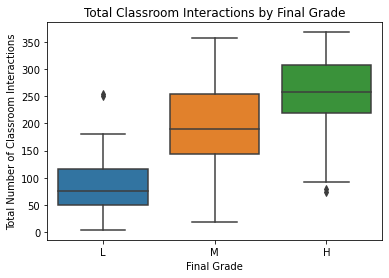

In [5]:
sns.boxplot(x='Class', y='TotalInteraction', order = ['L', 'M', 'H'], data = df)
plt.title("Total Classroom Interactions by Final Grade")
plt.xlabel('Final Grade')
plt.ylabel('Total Number of Classroom Interactions')

### Research Question 2: ###

*Does the sum of all classroom interactions accurately represent their engagement? (ie: does total interactions correlate with each category of interaction)*

The default correlation for Seaborn's heatmap is Pearson's correlation as it is the standard for statistics when looking for relationships between two continuous variables. I used the accepted structure for categorizing the extent of the correlations: low is 0 to +/- .29; medium is +/- /30 to +/- .49; and high being +/-.50 to +/- 1. Having a score of +/- 1 means that variables are perfectly correlated. A value of r = 0 indicates that variables are not correlated at all. 

Looking at the correlation matruct below, the sum of total interactions within the classroom is highly correlated with each of the singular interaction variables (r > .83). This is easily visuatized as the lighter the color square, the higher the correlation (as also indicated by the correlation number). All are positively correlated meaning an increase in one interaction is associated with an increase in another type of classroom interaction.

It is pertinent to note that discussion participation is not as highly correlated with the total interaction score. In general, the number of times a student participated in the class has a low correlation with other variables.

Note: The diagonal is a "perfect" correlation as the varibale is simply correlating with itself.



<AxesSubplot:>

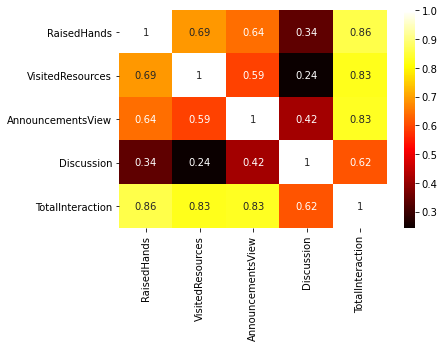

In [6]:
cor = df.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, 
            cmap='hot')

### Research Question 3: ###

*Does Gender have an influence on the Total Interaction?*

When discussing gender vs. total interaction, through the visualization of the barplot, it is clear that there is a big disparity within the amount of interaction between males and females. 

From our previous findings one can assume that females are higher achievers due to their increased overall participation. 

Although, it is important to note that this dataset has data from 1.74 times as many males as females, so that may be an influential factor to consider.


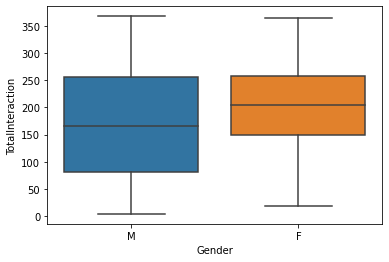

In [7]:
boxplot = sns.boxplot(x='Gender', y='TotalInteraction', data = df)

### Research Question 4: ###

*Does the Parent's satisfaction level with the school correlate with the total interaction of their students?*

The dataset proves that parents whose students had higher levels of  participation, had a higher satisfaction rate with the school. The catplot demonstrates that a majority of parents who had a positive rating of their school, had high achieving students, and vice versa.


In [8]:
dataPSS = df.groupby('ParentschoolSatisfaction', as_index = False)['TotalInteraction'].mean()
dataPSS

,ParentschoolSatisfaction,TotalInteraction
0,Bad,144.409574
1,Good,207.476027


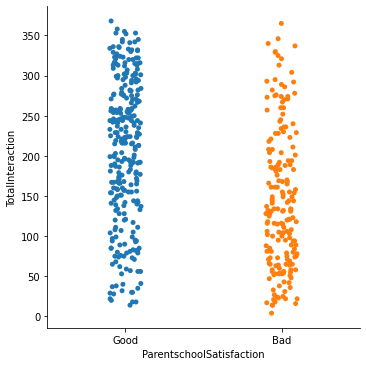

In [9]:
catplot = sns.catplot(data = df, y='TotalInteraction', x='ParentschoolSatisfaction')
catplot

# Conclusions #

We explored a number of different relationships that exist within this data set pertaining to classroom interactions. We were able to use a variety of visulatizations to see that as total number of classroom interactions increases, final grade categorization gets higher; (RQ3 results); and (RQ4 results). We were also able to confirm that the total number of classroom interactions was a valid way to indicate classroom participation and use this as our main variable in our other analyses. 

These findings are important for teachers, parents, and students. Teachers can encouraging interactions which may result in higher grades (note: causation is yet to be established). We also know that boys typically have a lower class number of classroom interactions and perhaps need more encouragement. 
